# Rain Dataset is to predict whether or not it will rain tomorrow. 
The Dataset contains about 10 years of daily weather observations of different locations in Australia.
Here, predict two things:
 
# 1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [5]:
data['Date'] = data['Date'].str.replace("-","").astype(int)

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

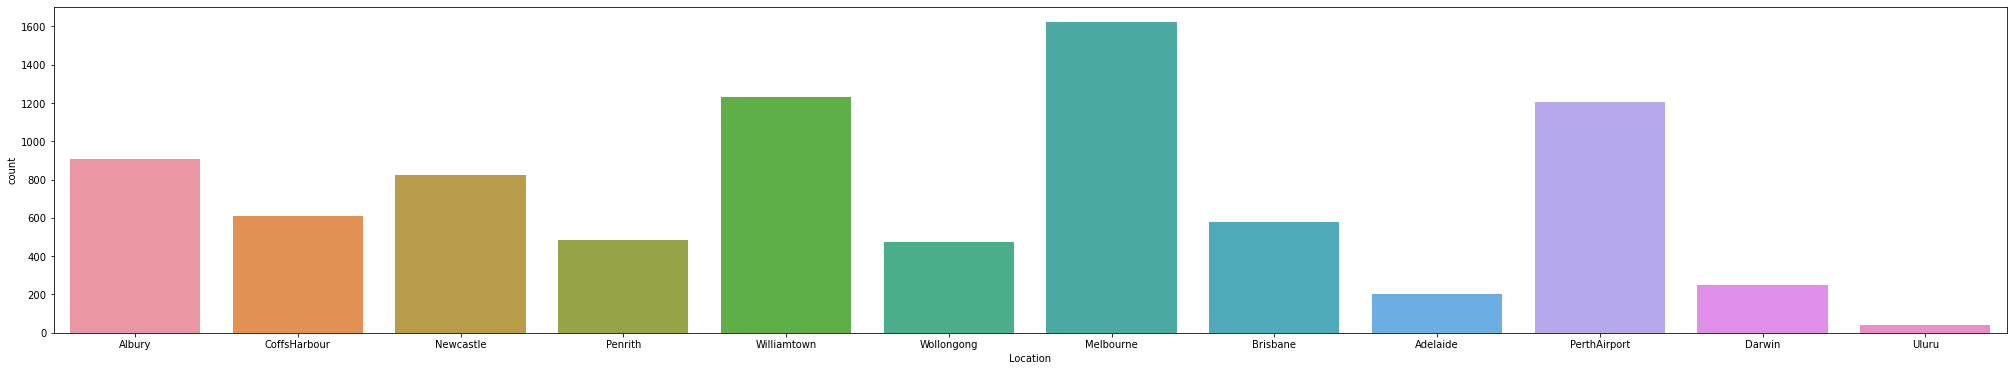

In [7]:
plt.figure(figsize=(35,6))
ax= sns.countplot(x='Location',data = data)
data['Location'].value_counts()

Max no of weather location present in the Melbourne and Williamtown and min in the Uluru

N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64

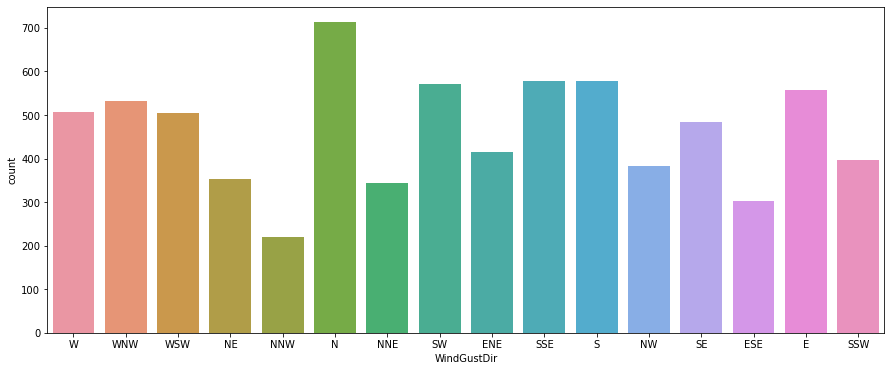

In [8]:
plt.figure(figsize=(15,6))
ax= sns.countplot(x='WindGustDir',data = data)
data['WindGustDir'].value_counts()

The direction of the strongest wind gust in the 24 hours to midnight In N(North) and min in NNW(north-north-west)

N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: WindDir9am, dtype: int64

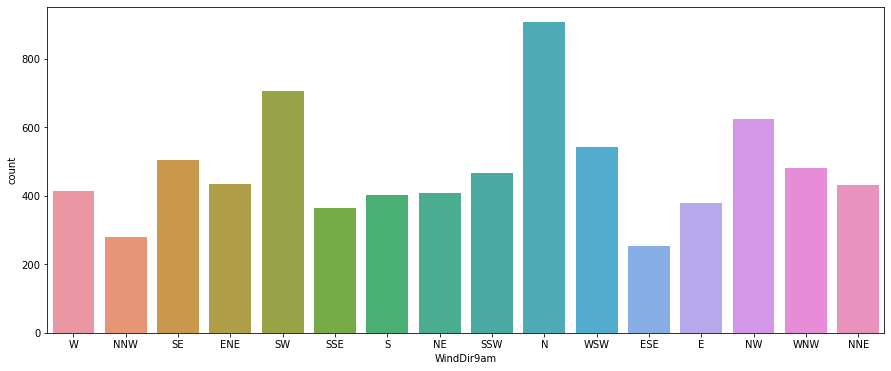

In [9]:
plt.figure(figsize=(15,6))
ax= sns.countplot(x='WindDir9am',data = data)
data['WindDir9am'].value_counts()

Direction of the wind from 9amis maximum in N(north) and SW(south west) and min in ESE(east south east)

SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
W      462
ESE    462
E      460
ENE    417
SSW    370
NNE    365
NNW    306
Name: WindDir3pm, dtype: int64

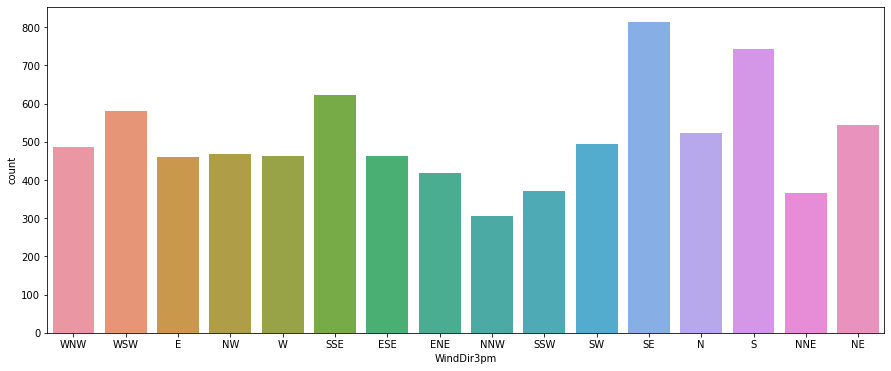

In [10]:
plt.figure(figsize=(15,6))
ax= sns.countplot(x='WindDir3pm',data = data)
data['WindDir3pm'].value_counts()

Direction of the wind from 3 pm is maximum in SE(south east) and S(south) and min in NNW()north north west

No     6195
Yes    1990
Name: RainToday, dtype: int64

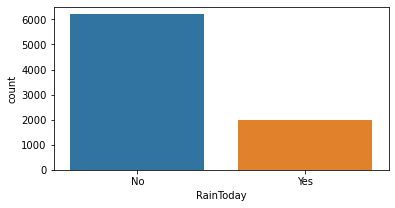

In [12]:
plt.figure(figsize=(6,3))
ax= sns.countplot(x='RainToday',data = data)
data['RainToday'].value_counts()

There is max no of No means precipation in the 24 hours to 9 am does not exceeds 1 mm

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

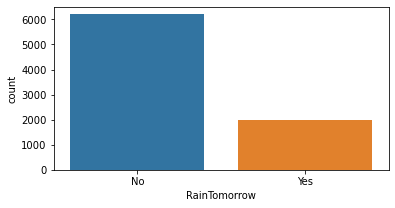

In [13]:
plt.figure(figsize=(6,3))
ax= sns.countplot(x='RainTomorrow',data = data)
data['RainTomorrow'].value_counts()

The amount of rain in next day is very low 

In [14]:
data.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8.425000e+03,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,2.012168e+07,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,2.470263e+04,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,2.008120e+07,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,2.010071e+07,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,2.011122e+07,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,2.014091e+07,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,2.017062e+07,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [15]:
# first we have to fill zeroes with their means

In [16]:
data['WindSpeed9am'] = data['WindSpeed9am'].replace(0,data['WindSpeed9am'].mean())

In [18]:
data['WindSpeed3pm'] = data['WindSpeed3pm'].replace(0,data['WindSpeed3pm'].mean())

In [19]:
data['Cloud9am'] = data['Cloud9am'].replace(0,data['Cloud9am'].mean())

In [20]:
data['Cloud3pm'] = data['Cloud3pm'].replace(0,data['Cloud3pm'].mean())

In [21]:
data['Evaporation'] = data['Evaporation'].replace(0,data['Evaporation'].mean())

In [22]:
data['Sunshine'] = data['Sunshine'].replace(0,data['Sunshine'].mean())

In [23]:
data.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8.425000e+03,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,2.012168e+07,13.193305,23.859976,2.805913,5.402559,7.918133,40.174469,15.094913,18.977062,67.822496,51.249790,1017.640233,1015.236075,4.987993,4.764925,17.762015,22.442934
std,2.470263e+04,5.403596,6.136408,10.459379,5.037429,3.593900,14.665721,9.202849,9.326231,16.833283,18.423774,6.828699,6.766681,2.485714,2.492903,5.627035,5.980020
min,2.008120e+07,-2.000000,8.200000,0.000000,0.200000,0.100000,7.000000,2.000000,2.000000,10.000000,6.000000,989.800000,982.900000,1.000000,1.000000,1.900000,7.300000
25%,2.010071e+07,9.200000,19.300000,0.000000,2.600000,5.600000,30.000000,9.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,3.000000,2.000000,13.800000,18.000000
50%,2.011122e+07,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.847646,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,2.014091e+07,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,2.017062e+07,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


 we fix zeroes and not fixing the zeroes of Rainfall as it is possible that the amount of recorded rainfall could be zero for the day

# now fillings Nans

In [24]:
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [25]:
data['MinTemp'] = data['MinTemp'].fillna(data['MinTemp'].mean())

In [27]:
data['MaxTemp'] = data['MaxTemp'].fillna(data['MaxTemp'].mean())

In [124]:
data['Rainfall'] = data['Rainfall'].fillna(data['Rainfall'].mean())

In [125]:
data['Evaporation'] = data['Evaporation'].fillna(data['Evaporation'].mean())

In [30]:
data['Sunshine'] = data['Sunshine'].fillna(data['Sunshine'].mean())

In [34]:
data['WindGustSpeed'] = data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean())

In [35]:
data['WindSpeed9am'] = data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean())

In [36]:
data['WindSpeed3pm'] = data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean())

In [37]:
data['Humidity9am'] = data['Humidity9am'].fillna(data['Humidity9am'].mean())

In [38]:
data['Humidity3pm'] = data['Humidity3pm'].fillna(data['Humidity3pm'].mean())

In [39]:
data['Pressure9am'] = data['Pressure9am'].fillna(data['Pressure9am'].mean())

In [40]:
data['Pressure3pm'] = data['Pressure3pm'].fillna(data['Pressure3pm'].mean())

In [41]:
data['Cloud9am'] = data['Cloud9am'].fillna(data['Cloud9am'].mean())

In [42]:
data['Cloud3pm'] = data['Cloud3pm'].fillna(data['Cloud3pm'].mean())

In [43]:
data['Temp9am'] = data['Temp9am'].fillna(data['Temp9am'].mean())

In [44]:
data['Temp3pm'] = data['Temp3pm'].fillna(data['Temp3pm'].mean())

In [46]:
# lets fill the nans in the Rain tomorrow and in Rain Today with most occuring element

In [50]:
data['RainToday'] = data['RainToday'].fillna('No')

In [51]:
data['RainTomorrow'] = data['RainTomorrow'].fillna('No')

In [53]:
data['WindGustDir'] = data['WindGustDir'].fillna('N')

In [54]:
data['WindDir9am'] = data['WindDir9am'].fillna('N')

In [55]:
data['WindDir3pm'] = data['WindDir3pm'].fillna('SE')

In [56]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [57]:
# NOW WE FIXED THE NANS NOW WE WILL ANALYSISNG SOME DATA 

<AxesSubplot:xlabel='Location', ylabel='Evaporation'>

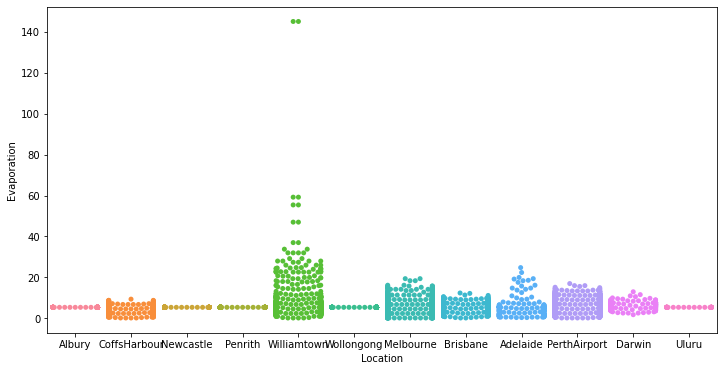

In [58]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='Location',y='Evaporation',data=data)

Clearly we all know about the fact that Rainfall directly depends on the Evaporation. The amount of Evaporation more The chance of rain fall is more 

Clearly we can see there are some places where Evaporation is more like- Williamtown,Melbournre,and PerthAirport

<AxesSubplot:xlabel='Location', ylabel='Sunshine'>

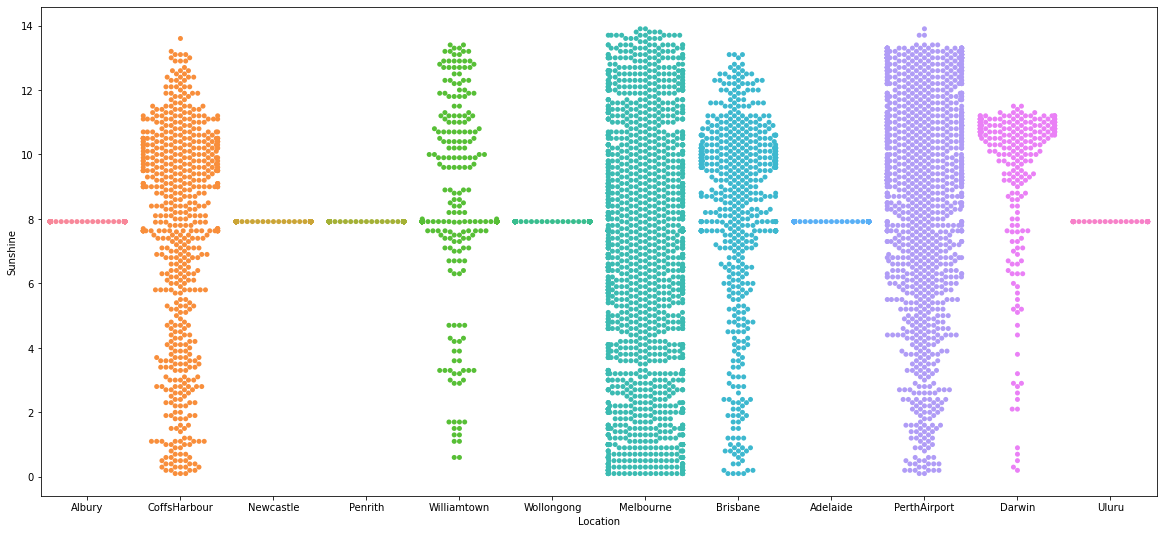

In [63]:
plt.figure(figsize=(20,9))
sns.swarmplot(x='Location',y='Sunshine',data=data)

AS WE SHOWN IN THE GRAPH THAT THERE ARE SOME LOCATION WHERE SUNSHINE IS BRIGHT MORE THAN 8 HoURS IN A DAY 

<AxesSubplot:xlabel='Temp9am', ylabel='Pressure9am'>

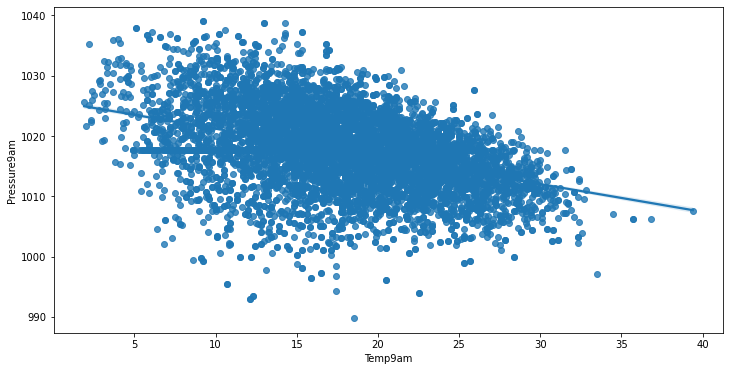

In [64]:
plt.figure(figsize=(12,6))
sns.regplot(x='Temp9am',y='Pressure9am',data=data)

as we can see from the graph that when Temp is low then the pressure is very high and as the temp increase the pressure will decrease 

<AxesSubplot:xlabel='Temp9am', ylabel='Humidity9am'>

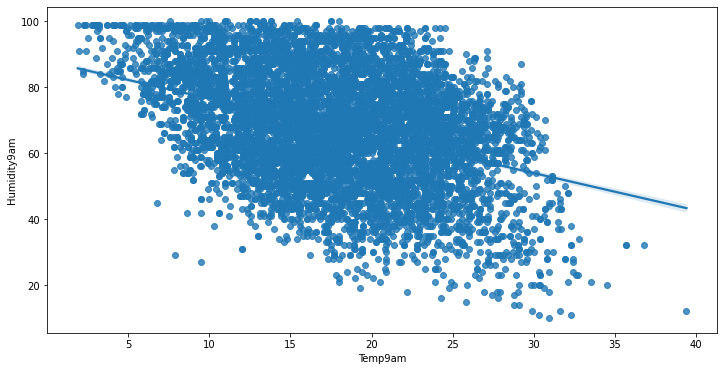

In [65]:
plt.figure(figsize=(12,6))
sns.regplot(x='Temp9am',y='Humidity9am',data=data)

Same with this graph as we shown above as the TEMP increases Humidity start to decrease

<AxesSubplot:xlabel='Temp9am', ylabel='Cloud9am'>

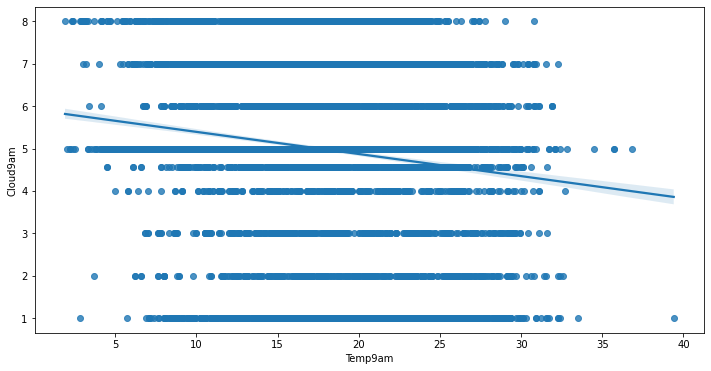

In [67]:
plt.figure(figsize=(12,6))
sns.regplot(x='Temp3pm',y='Cloud3pm',data=data)

So the cloud will be more at when temp is low and when temp increases then the fraction of sky obscured getting low by clouds

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

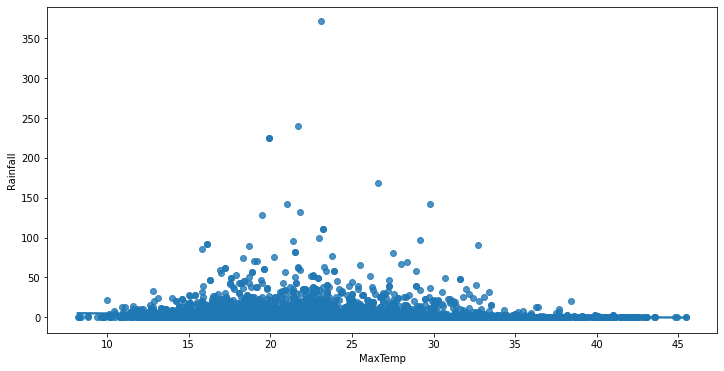

In [69]:
plt.figure(figsize=(12,6))
sns.regplot(x='MaxTemp',y='Rainfall',data=data)

the graph clearly tells as the max temp when it more than 30 then the amount of rainfall is very low

<AxesSubplot:xlabel='Temp9am', ylabel='Rainfall'>

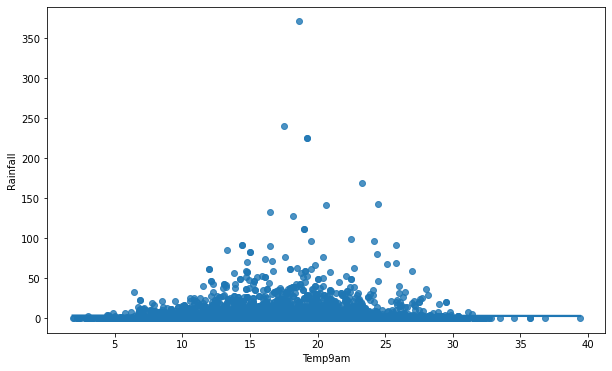

In [73]:
plt.figure(figsize=(10,6))
sns.regplot(x='Temp9am',y='Rainfall',data=data)

So the amount of rainfall recorded is max when the temp9am have temp between (10-28)

<AxesSubplot:xlabel='Temp3pm', ylabel='Rainfall'>

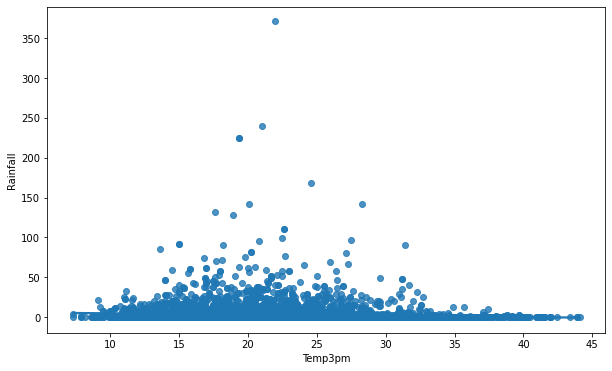

In [75]:
plt.figure(figsize=(10,6))
sns.regplot(x='Temp3pm',y='Rainfall',data=data)

So the amount of rainfall recorded is max when the temp3pm have temp between (10-33)

<AxesSubplot:xlabel='Cloud9am', ylabel='Rainfall'>

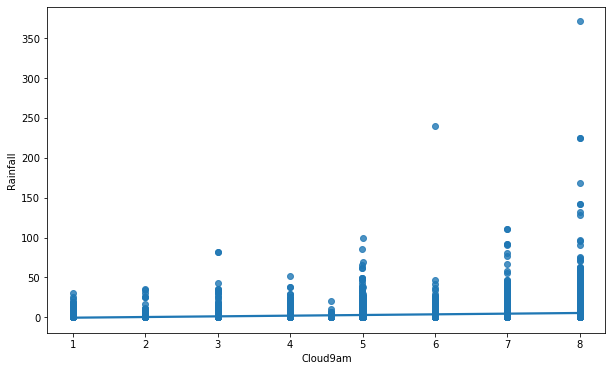

In [76]:
plt.figure(figsize=(10,6))
sns.regplot(x='Cloud9am',y='Rainfall',data=data)

when the sky fraction obscured is at 8 the amount of rainfall recorded is maximum

<AxesSubplot:xlabel='Humidity9am', ylabel='Rainfall'>

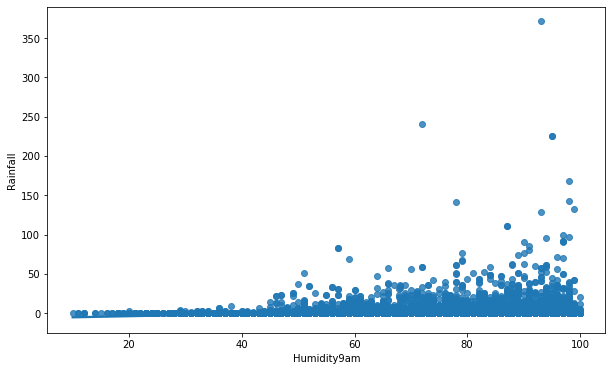

In [77]:
plt.figure(figsize=(10,6))
sns.regplot(x='Humidity9am',y='Rainfall',data=data)

The amount of Rainfall is max when the humidity(%) is more than 60

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Rainfall'>

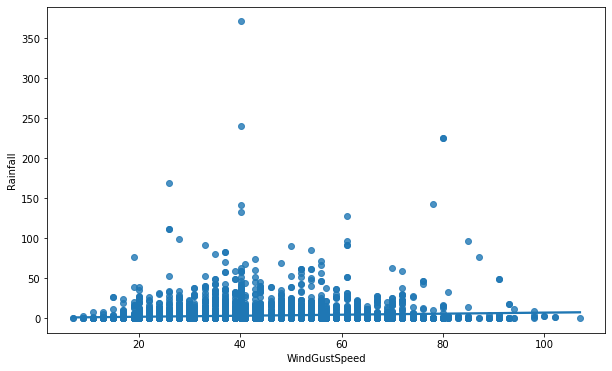

In [78]:
plt.figure(figsize=(10,6))
sns.regplot(x='WindGustSpeed',y='Rainfall',data=data)

When the speed of the strongest wind is in the range between (20-60 ) then the AMount of Rainfall is more and when the speed increases of the strongest wind then rainfall amount decreases

In [80]:
# now encode some object data

In [81]:
from sklearn.preprocessing import LabelEncoder

In [83]:
le = LabelEncoder()
var_mode = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

for i in var_mode:
    data[i] = le.fit_transform(data[i])

In [85]:
data.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,8.425000e+03,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,...,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,2.012168e+07,5.793591,13.193305,23.859976,2.805913,5.402559,7.918133,7.217804,40.174469,7.267418,...,67.822496,51.249790,1017.640233,1015.236075,4.987993,4.764925,17.762015,22.442934,0.236202,0.236320
std,2.470263e+04,3.162654,5.379488,6.114516,10.309308,3.846617,2.606206,4.702616,13.776101,4.588045,...,16.774231,18.311894,6.275759,6.217451,2.098342,2.098442,5.608301,5.945849,0.424773,0.424846
min,2.008120e+07,0.000000,-2.000000,8.200000,0.000000,0.200000,0.100000,0.000000,7.000000,0.000000,...,10.000000,6.000000,989.800000,982.900000,1.000000,1.000000,1.900000,7.300000,0.000000,0.000000
25%,2.010071e+07,3.000000,9.300000,19.300000,0.000000,4.000000,7.918133,3.000000,31.000000,3.000000,...,56.000000,39.000000,1014.000000,1011.400000,4.566622,4.000000,13.800000,18.100000,0.000000,0.000000
50%,2.011122e+07,6.000000,13.200000,23.300000,0.000000,5.402559,7.918133,7.000000,40.174469,7.000000,...,68.000000,51.000000,1017.640233,1015.236075,4.987993,4.764925,17.762015,22.000000,0.000000,0.000000
75%,2.014091e+07,8.000000,17.300000,28.000000,1.400000,5.402559,8.900000,12.000000,48.000000,12.000000,...,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,0.000000,0.000000
max,2.017062e+07,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,15.000000,107.000000,15.000000,...,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000


In [86]:
data['WindGustDir'] = data['WindGustDir'].replace(0,data['WindGustDir'].mean())

In [88]:
data['WindDir9am'] = data['WindDir9am'].replace(0,data['WindDir9am'].mean())

In [90]:
data['WindDir3pm'] = data['WindDir3pm'].replace(0,data['WindDir3pm'].mean())

In [91]:
# now check some skewness

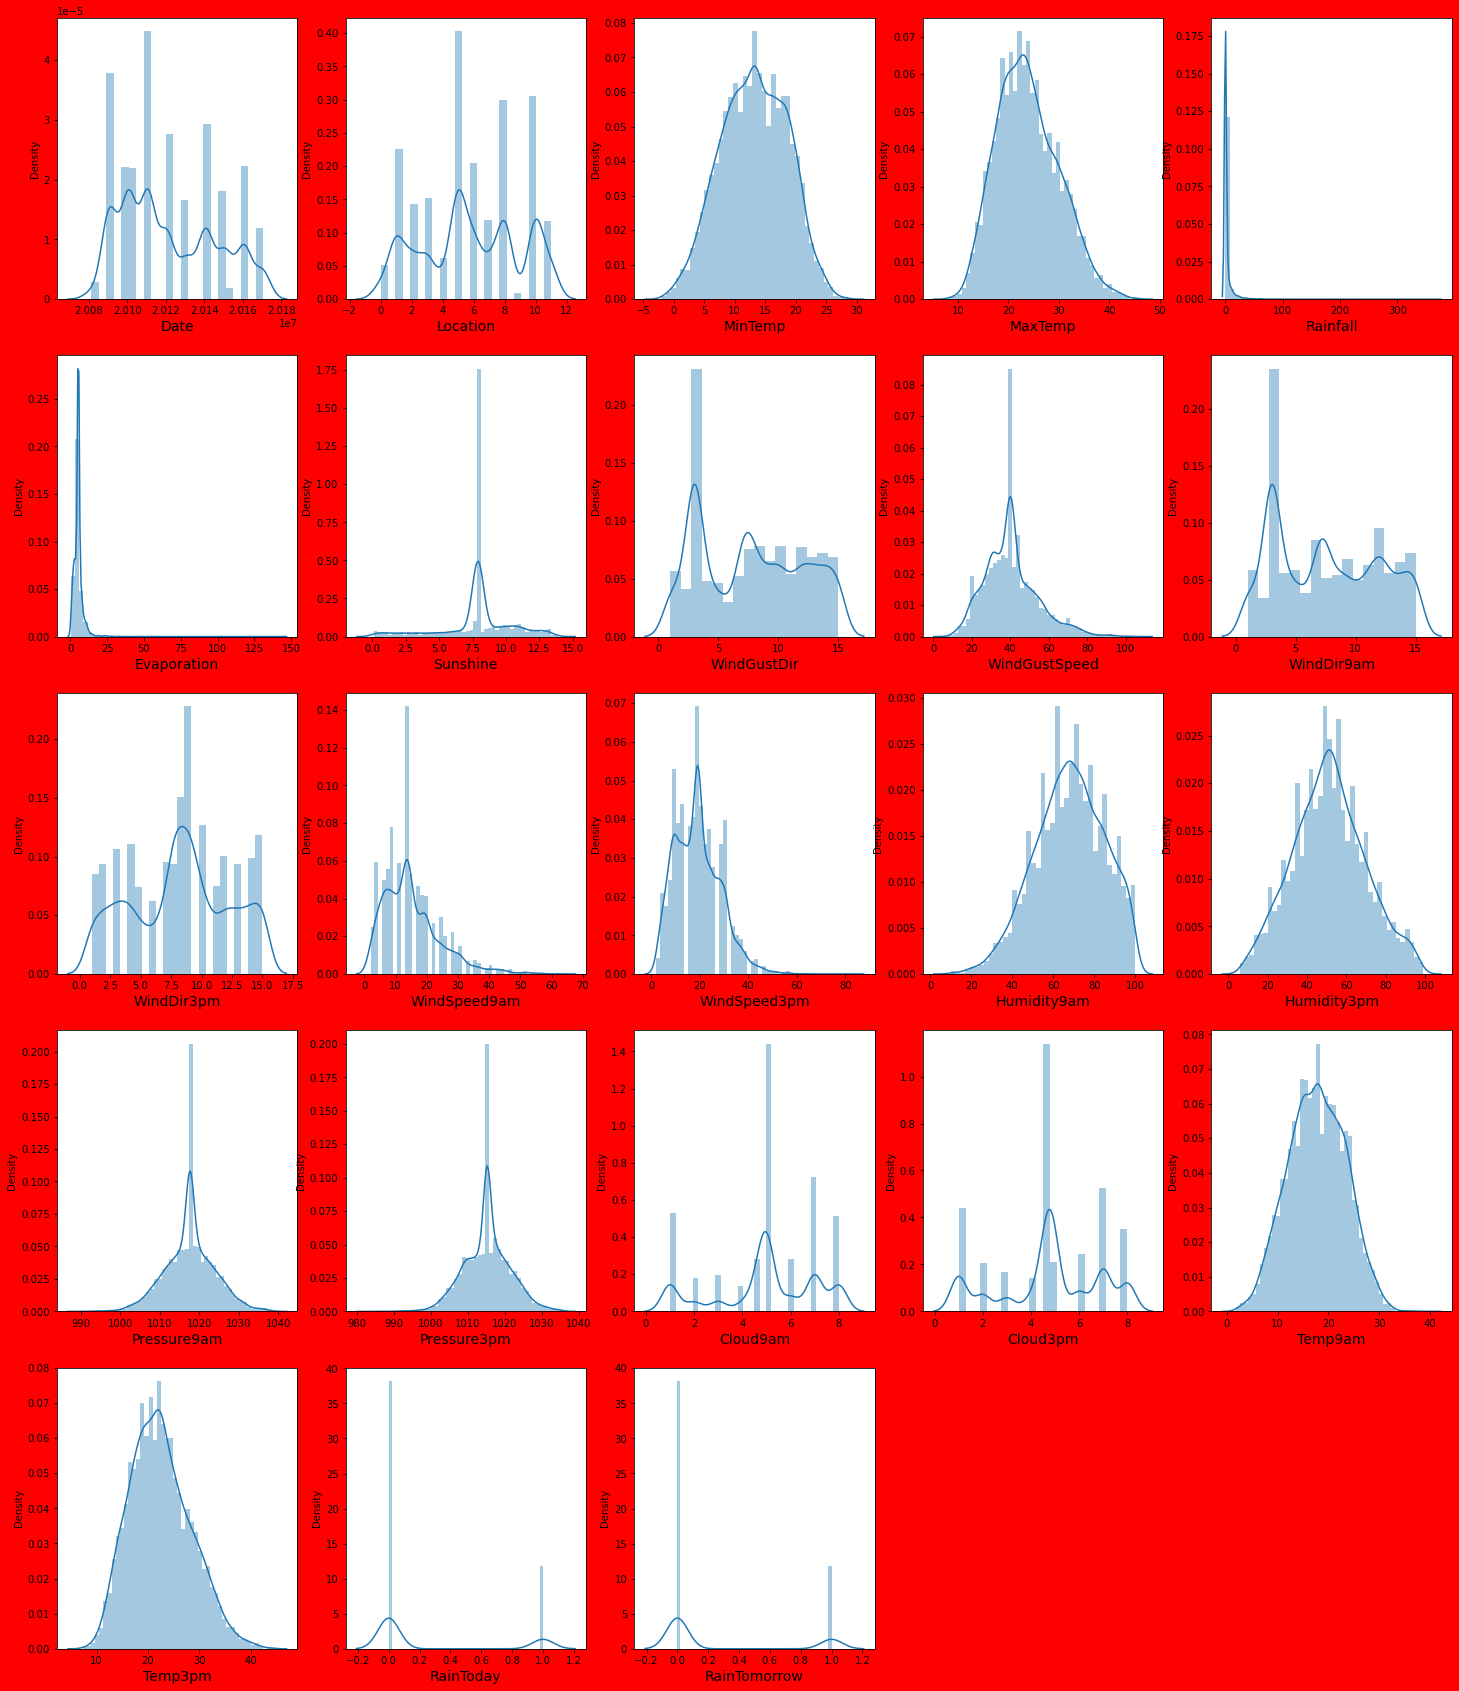

In [92]:
plt.figure(figsize = (25,30),facecolor = "red")
plotnumber = 1
for column in data:
    if plotnumber<=23:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=14)
        
    plotnumber+=1
plt.show()

In [93]:
data.skew()

Date              0.416778
Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.076606
Sunshine         -0.747886
WindGustDir       0.136299
WindGustSpeed     0.757000
WindDir9am        0.196540
WindDir3pm       -0.078749
WindSpeed9am      1.195469
WindSpeed3pm      0.612993
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.498962
Cloud3pm         -0.332010
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
dtype: float64

As we can see that there is too much skewness present in the two Continous columns so we remove this by sqrt transformation

In [97]:
data['Rainfall'] = np.sqrt(data['Rainfall'])

In [103]:
data['Evaporation'] = np.sqrt(data['Evaporation'])

In [105]:
data['WindSpeed9am'] = np.sqrt(data['WindSpeed9am'])

In [106]:
data.skew()

Date             0.416778
Location        -0.050456
MinTemp         -0.089989
MaxTemp          0.380654
Rainfall        -0.484405
Evaporation     -1.252770
Sunshine        -0.747886
WindGustDir      0.136299
WindGustSpeed    0.757000
WindDir9am       0.196540
WindDir3pm      -0.078749
WindSpeed9am     0.326118
WindSpeed3pm     0.612993
Humidity9am     -0.256743
Humidity3pm      0.118281
Pressure9am     -0.024082
Pressure3pm     -0.010214
Cloud9am        -0.498962
Cloud3pm        -0.332010
Temp9am         -0.014748
Temp3pm          0.397331
RainToday        1.242362
RainTomorrow     1.241588
dtype: float64

Now skewness of Continous columns comes under of a good range

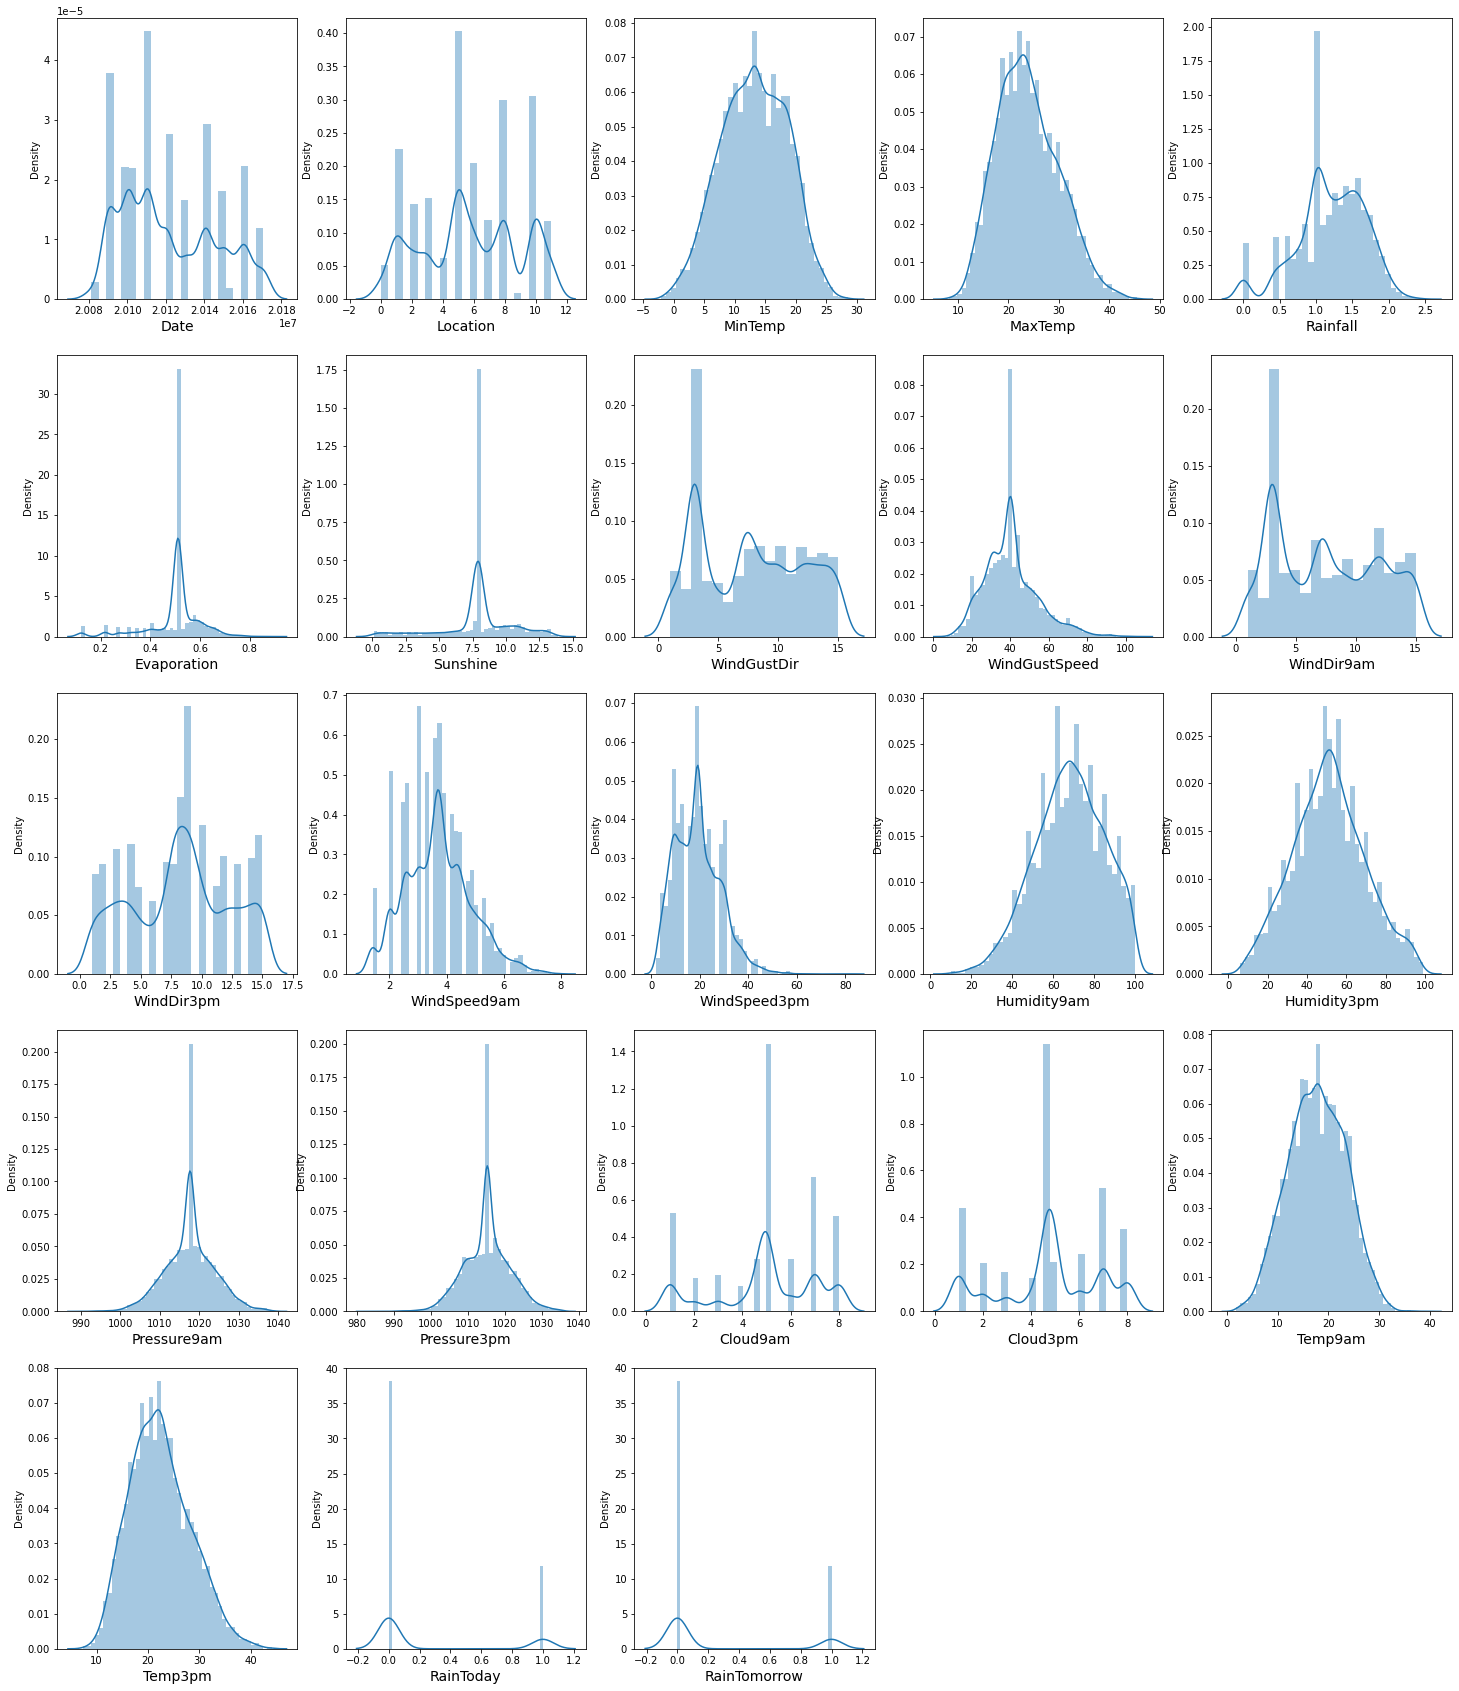

In [107]:
plt.figure(figsize = (25,30),facecolor = "white")
plotnumber = 1
for column in data:
    if plotnumber<=23:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=14)
        
    plotnumber+=1
plt.show()

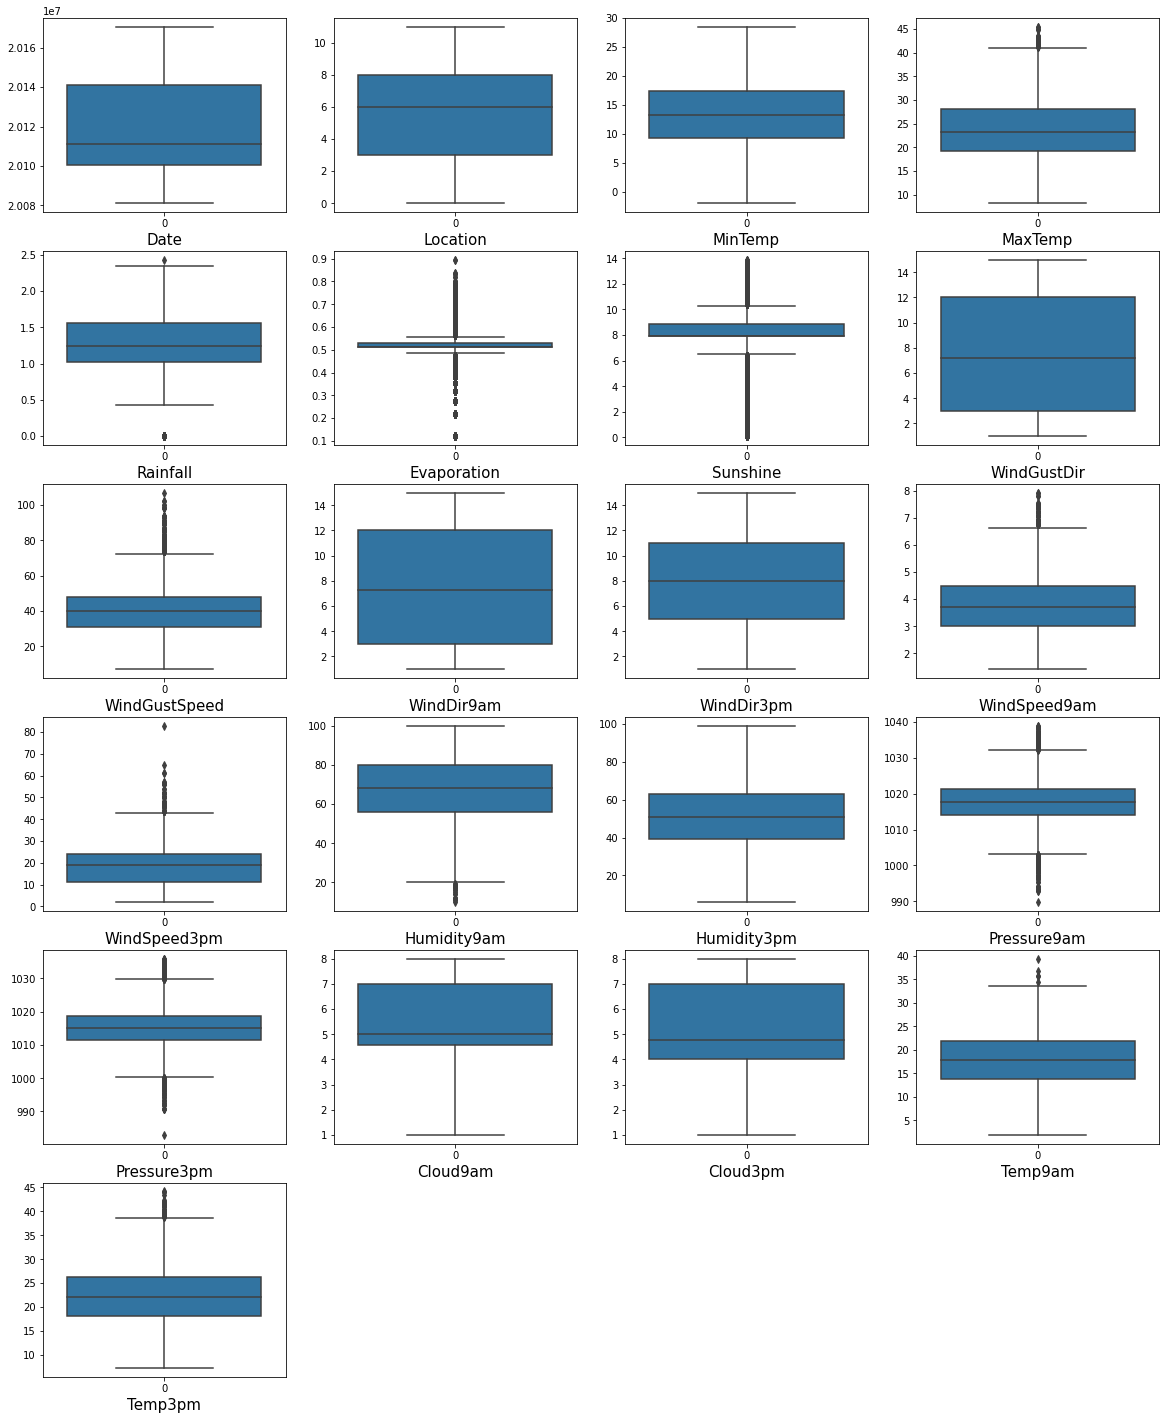

In [116]:
plt.figure(figsize = (20,25))
plotnumber = 1
for column in data:
    if plotnumber<=21:
        plt.subplot(6,4,plotnumber)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

There is too much outliers in the Continous columns like Evaporation and Rainfall so remove them and make them free

In [108]:
data.corr()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,1.000000,0.485823,0.040756,0.117645,-0.002104,0.130211,0.063284,-0.081895,-0.041729,-0.031063,...,0.098226,-0.029983,0.030687,0.014043,0.021667,-0.007442,0.086542,0.130260,-0.011312,-0.011101
Location,0.485823,1.000000,0.116531,0.064268,-0.005488,0.138710,0.050769,-0.027294,0.231396,-0.020225,...,0.005662,0.055790,-0.032261,-0.020574,0.046489,0.022387,0.118051,0.060570,0.003071,0.002824
MinTemp,0.040756,0.116531,1.000000,0.717522,0.113129,0.259366,0.075370,-0.119101,0.230058,-0.018729,...,-0.130731,0.079048,-0.429432,-0.422991,0.061544,0.019214,0.887119,0.685520,0.064789,0.092942
MaxTemp,0.117645,0.064268,0.717522,1.000000,-0.016650,0.309839,0.363784,-0.172721,0.139998,-0.183282,...,-0.390976,-0.421879,-0.325721,-0.403258,-0.222531,-0.232273,0.866039,0.974506,-0.224883,-0.152886
Rainfall,-0.002104,-0.005488,0.113129,-0.016650,1.000000,0.024896,-0.063460,0.008537,0.082983,0.102206,...,0.193525,0.188118,-0.059416,-0.028853,0.139739,0.113310,0.054336,-0.018532,0.394153,0.196313
Evaporation,0.130211,0.138710,0.259366,0.309839,0.024896,1.000000,0.226898,-0.052321,0.142560,-0.097720,...,-0.163296,-0.137554,-0.194161,-0.197375,-0.019725,-0.049396,0.291275,0.300786,-0.115665,-0.055962
Sunshine,0.063284,0.050769,0.075370,0.363784,-0.063460,0.226898,1.000000,-0.055573,-0.023149,-0.042441,...,-0.327627,-0.387512,0.018509,-0.037499,-0.462024,-0.479498,0.254832,0.381735,-0.205465,-0.300477
WindGustDir,-0.081895,-0.027294,-0.119101,-0.172721,0.008537,-0.052321,-0.055573,1.000000,0.027318,0.385713,...,-0.014616,-0.004286,-0.101846,-0.024678,0.051598,0.034716,-0.133955,-0.182055,0.109579,0.026407
WindGustSpeed,-0.041729,0.231396,0.230058,0.139998,0.082983,0.142560,-0.023149,0.027318,1.000000,-0.061400,...,-0.269593,-0.091860,-0.407139,-0.372651,0.033503,0.089991,0.202298,0.102199,0.076822,0.190127
WindDir9am,-0.031063,-0.020225,-0.018729,-0.183282,0.102206,-0.097720,-0.042441,0.385713,-0.061400,1.000000,...,-0.005246,0.098785,-0.006702,0.072800,0.043780,0.029225,-0.074859,-0.189232,0.145974,0.015292


<AxesSubplot:>

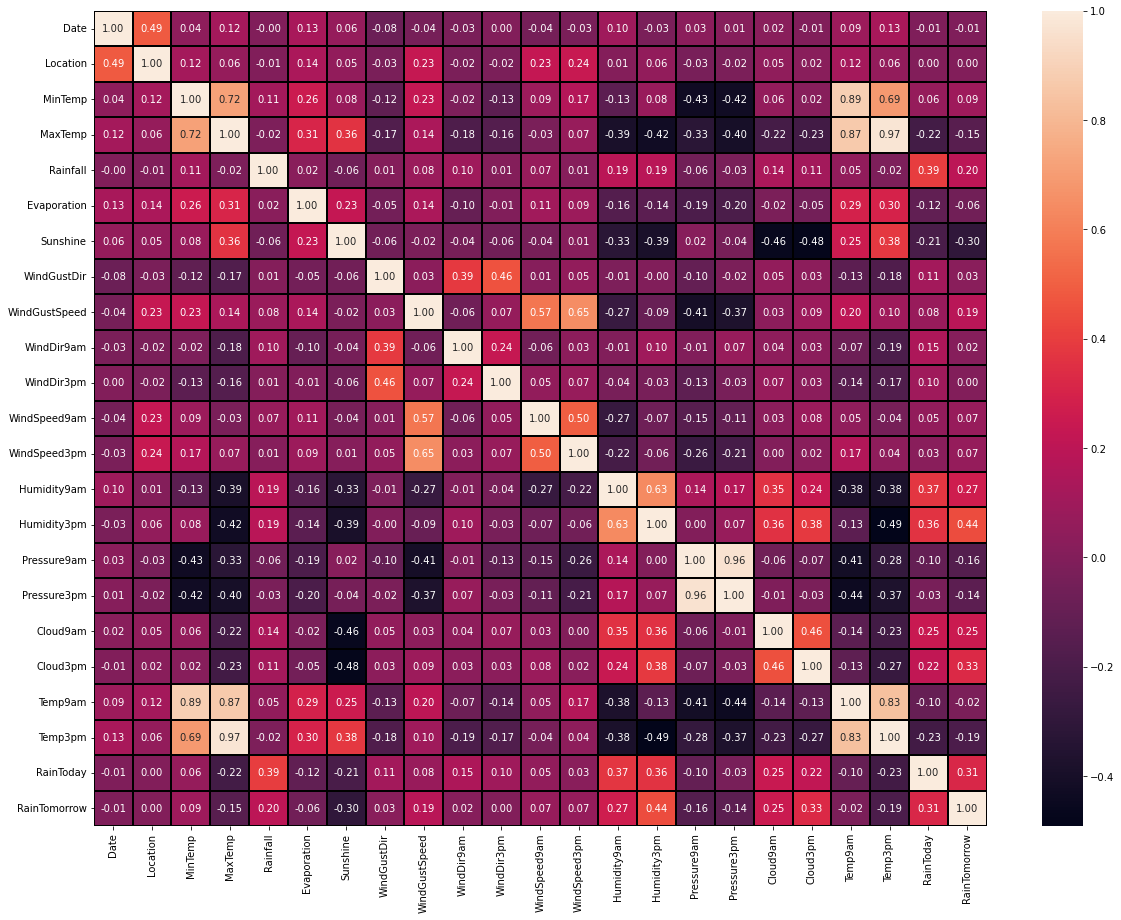

In [110]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,linewidth = 0.2,linecolor = 'black',fmt='0.2f')

There are too many columns which can be highly correlated and can raise the problem of multicollinearity

MinTemp and MaxTemp can be correlated 

MinTemp, MaxTemp and Temp9am and Temp3pm can be correlated

WindGust speed and Windspeed9am and Windspeed3pm can be correlated

Pressure9am and Pressure3pm highly correlated

Temp9am and Temp3pm highly correlated

Humidity9am and Humidity3om are highly correlated 

Lets check multicollinearity for one more prrof

In [129]:
# seprating the columns into features and target
x= data.drop("RainTomorrow",axis=1)
y= data["RainTomorrow"]

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [131]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled= sc.fit_transform(x)

In [132]:
x_scaled.shape[1]

22

In [133]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["features"] = x.columns

vif

,vif,features
0,1.480362,Date
1,1.541713,Location
2,8.089067,MinTemp
3,26.203572,MaxTemp
4,1.042846,Rainfall
5,1.164012,Evaporation
6,1.651473,Sunshine
7,1.468662,WindGustDir
8,2.456239,WindGustSpeed
9,1.338572,WindDir9am


As the vif value is very more than 5 so there is also a prrof that there is too much of collinearity

In [134]:
# lets drop some columns

In [135]:
data = data.drop(['MaxTemp','Pressure3pm','Temp3pm','Humidity3pm'],axis=1)

In [137]:
data.shape

(8425, 19)

In [284]:
from scipy.stats import zscore      # to remove outliers

In [285]:
z_score = zscore(data[['Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Pressure9am','Humidity9am','Temp9am']])
abs_z_score = np.abs(z_score)
threshold=3
np.where(abs_z_score>3)

(array([   7,  342,  447,  579,  580,  763,  893,  900,  929,  930,  992,
         998, 1008, 1019, 1023, 1027, 1046, 1082, 1090, 1107, 1130, 1143,
        1172, 1245, 1251, 1252, 1256, 1257, 1270, 1282, 1283, 1284, 1293,
        1315, 1325, 1334, 1342, 1351, 1357, 1379, 1384, 1398, 1402, 1411,
        1532, 1543, 1546, 1569, 1582, 1948, 2147, 2167, 2679, 2697, 2705,
        2724, 2731, 2744, 2750, 2778, 2786, 2799, 2818, 2849, 2860, 2869,
        2876, 2880, 2888, 2888, 2897, 2919, 2966, 2968, 2973, 2978, 2978,
        3028, 3030, 3038, 3138, 3312, 3423, 3482, 3500, 3508, 3527, 3534,
        3547, 3553, 3581, 3589, 3602, 3621, 3652, 3663, 3672, 3679, 3683,
        3691, 3691, 3700, 3722, 3769, 3771, 3776, 3781, 3781, 3831, 3833,
        3841, 3941, 4115, 4226, 4272, 4274, 4288, 4289, 4292, 4332, 4393,
        4409, 4427, 4466, 4479, 4507, 4520, 4534, 4536, 4537, 4544, 4548,
        4550, 4563, 4568, 4572, 4588, 4620, 4627, 4657, 4667, 4685, 4712,
        4720, 4727, 4736, 4737, 4741, 

In [ ]:
fil_entry = (abs_z_score<3).all(axis=1)
data = data[fil_entry]
data

In [146]:
# seprating the columns into features and target
x= data.drop("RainTomorrow",axis=1)
y= data["RainTomorrow"]


# So Now we are ready to build the first model i.e- Rain will come tomorrow or not

In [147]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split

In [148]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.25)

In [149]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_lr)*100)
print('-------------------')
print('===================')
print('-------------------')
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

Accuracy 77.60284408329102
-------------------
-------------------
[[1528    0]
 [ 441    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      1528
           1       0.00      0.00      0.00       441

    accuracy                           0.78      1969
   macro avg       0.39      0.50      0.44      1969
weighted avg       0.60      0.78      0.68      1969



In [150]:
Test_accuracy = accuracy_score(y_test,pred_lr)

In [151]:
from sklearn.model_selection import cross_val_score

In [152]:
scr_lr = cross_val_score(lr,x,y,cv=5)
print("Cross Validation Score of logistic regression model is :- ",scr_lr.mean())

Cross Validation Score of logistic regression model is :-  0.7740378774127186


In [153]:
# now we trying with Decision tree classifier 

In [154]:
from sklearn.tree import DecisionTreeClassifier

In [155]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_dt)*100)
print('-------------------------')
print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

Accuracy 81.86896901980701
-------------------------
[[1337  191]
 [ 166  275]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1528
           1       0.59      0.62      0.61       441

    accuracy                           0.82      1969
   macro avg       0.74      0.75      0.74      1969
weighted avg       0.82      0.82      0.82      1969



In [156]:
scr_dt = cross_val_score(dt,x,y,cv=5)
print("Cross Validation Score of Decision TREE model is :-",scr_dt.mean())

Cross Validation Score of Decision TREE model is :- 0.747222040701075


In [157]:
# now check with random forest classifier

In [158]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_rf)*100)
print('=======================================')
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

Accuracy 87.201625190452
[[1469   59]
 [ 193  248]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1528
           1       0.81      0.56      0.66       441

    accuracy                           0.87      1969
   macro avg       0.85      0.76      0.79      1969
weighted avg       0.87      0.87      0.86      1969



In [166]:
scr_rf = cross_val_score(rf,x,y,cv=9)
print("Cross Validation Score of RANDOM FOREST model is :-",scr_rf.mean())

Cross Validation Score of RANDOM FOREST model is :- 0.8555728451563691


In [167]:
# now with SVC algo

In [168]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_train,y_train)

pred_sv=sv.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_sv)*100)

print('=========================================')
print(confusion_matrix(y_test,pred_sv))
print(classification_report(y_test,pred_sv))

Accuracy 77.60284408329102
[[1528    0]
 [ 441    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      1528
           1       0.00      0.00      0.00       441

    accuracy                           0.78      1969
   macro avg       0.39      0.50      0.44      1969
weighted avg       0.60      0.78      0.68      1969



In [169]:
scr = cross_val_score(sv,x,y,cv=5)
print("Cross Validation Score of SVC model is :-",scr.mean())

Cross Validation Score of SVC model is :- 0.7740378774127186


In [170]:
# now with Knn

In [171]:
from sklearn.neighbors import KNeighborsClassifier

In [172]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred_kn=kn.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_kn)*100)
print('=======================================')
print(confusion_matrix(y_test,pred_kn))
print(classification_report(y_test,pred_kn))

Accuracy 79.83748095479939
[[1420  108]
 [ 289  152]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1528
           1       0.58      0.34      0.43       441

    accuracy                           0.80      1969
   macro avg       0.71      0.64      0.66      1969
weighted avg       0.78      0.80      0.78      1969



In [173]:
knn = cross_val_score(kn,x,y,cv=5)
print("Cross Validation Score of Knn model is :-",knn.mean())

Cross Validation Score of Knn model is :- 0.7446940561908797


In [174]:
from sklearn.ensemble import GradientBoostingClassifier

In [175]:
gbd = GradientBoostingClassifier()
gbd.fit(x_train,y_train)
pred_gbd=gbd.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_gbd)*100)
print('=======================================')
print(confusion_matrix(y_test,pred_gbd))
print(classification_report(y_test,pred_gbd))

Accuracy 83.34179786693753
[[1447   81]
 [ 247  194]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1528
           1       0.71      0.44      0.54       441

    accuracy                           0.83      1969
   macro avg       0.78      0.69      0.72      1969
weighted avg       0.82      0.83      0.82      1969



In [176]:
gbdt = cross_val_score(gbd,x,y,cv=5)
print("Cross Validation Score of GBDT model is :-",gbdt.mean())

Cross Validation Score of GBDT model is :- 0.7722472721405376


# so the difference between the cross val score and the accuracy score is min for the Random Forest algo SO WE USED THIS algo
and the testing accuracy is grt than others


# BUT BEFORE USED HYPERPARAMETER TUNING WITH GRIDSEARCHCV

In [178]:
from sklearn.model_selection import GridSearchCV

In [179]:
parameters = {'max_depth':range(2,4),'min_samples_leaf':range(2,4),'min_samples_split':range(2,4),'n_estimators':[20,30,60,80]}

clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 20}


In [216]:
rf = RandomForestClassifier(max_depth= 4, min_samples_leaf=4, min_samples_split= 8, n_estimators= 20)

In [217]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=20)

In [218]:
y_pred = rf.predict(x_test)

In [219]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1485,   43],
       [ 321,  120]], dtype=int64)

In [220]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1528
           1       0.74      0.27      0.40       441

    accuracy                           0.82      1969
   macro avg       0.78      0.62      0.64      1969
weighted avg       0.80      0.82      0.78      1969



In [221]:
print("ACCURACY",accuracy_score(y_test,y_pred))

ACCURACY 0.8151345860843068


In [222]:
#since after tuning its accuracy decreases 

In [223]:
# ROC CURVE 

fpr,tpr,thresholds = roc_curve(y_test,y_pred)

In [224]:
print('THRESHOLDS=',thresholds)
print('True positive rate=',tpr)
print('FAlse positive rate=',fpr)


THRESHOLDS= [2 1 0]
True positive rate= [0.         0.27210884 1.        ]
FAlse positive rate= [0.         0.02814136 1.        ]


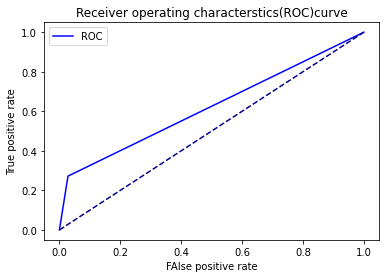

In [225]:
plt.plot(fpr,tpr,color = 'blue',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--')
plt.xlabel('FAlse positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characterstics(ROC)curve')
plt.legend()
plt.show()

In [226]:
# lets chk area it is covering(AUC)
auc_score = roc_auc_score(y_test,y_pred)
print(auc_score)

0.6219837411404352


In [227]:
# saving the model for later prediction
import pickle

In [229]:
filename = 'RAIN TOMORROW.pickle'
pickle.dump(rf,open(filename,'wb'))

# HENCE MODEL IS READY TO PREDICT FOR THE RAIN WILL COME OR NOT TOMORROW

# NOW WE ARE BUILDING A MODEL TO PREDICT THAT HOW MUCH RAINFALL COULD BE THERE

In [230]:
# seprating the columns into features and target
x= data.drop("Rainfall",axis=1)
y= data["Rainfall"]


In [255]:
from sklearn.linear_model import LinearRegression
lrc = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [256]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [257]:
lrc.fit(x_train,y_train)

LinearRegression()

In [258]:
pred_test = lrc.predict(x_test)

In [259]:
print(r2_score(y_test,pred_test))

0.07442292545101947


In [247]:
from sklearn.model_selection import cross_val_score

In [260]:
for j in range(3,10):
    cv_score = cross_val_score(lrc,x,y,cv=j)
    cv_mean = cv_score.mean()
    print("The accuracy of the model is ",cv_score.mean(),"at CV is", j)
    
     

The accuracy of the model is  0.03948264914371132 at CV is 3
The accuracy of the model is  0.03465795137000047 at CV is 4
The accuracy of the model is  0.04096716022892899 at CV is 5
The accuracy of the model is  0.040475291582363127 at CV is 6
The accuracy of the model is  0.03820730064528234 at CV is 7
The accuracy of the model is  0.042513188836565546 at CV is 8
The accuracy of the model is  0.04496813152708312 at CV is 9


In [249]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,pred_test)
R2

0.07442292545101947

In [251]:
from sklearn import metrics

In [252]:
MAE = metrics.mean_absolute_error(y_test,pred_test)
MSE = metrics.mean_squared_error(y_test,pred_test)

In [253]:
print("mean absolute error:",MAE)
print("mean squared error:",MSE)

mean absolute error: 0.07985287519470546
mean squared error: 0.02626184773387285


In [254]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 0.1620550762360527


In [261]:
# now chk with the random forest
from sklearn.ensemble import RandomForestRegressor

In [262]:
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=15)

# Fitting the model on our trained dataset.
RF.fit(x_train,y_train)

# Making Predictions
y_pred = RF.predict(x_test)

In [263]:
print(r2_score(y_test,y_pred))

0.11310360086887705


In [264]:
scr_rf = cross_val_score(RF,x,y,cv=3)
print("Cross Validation Score of random forest model is :-",scr_rf.mean())

Cross Validation Score of random forest model is :- 0.08317140781013936


In [265]:
# so as WITH LASSO

In [266]:
from sklearn.model_selection import GridSearchCV

In [267]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(2,10))}

ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 2}


In [268]:
ls = Lasso(alpha=0.01,random_state=2)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

In [269]:
lss = r2_score(y_test,pred_ls)
lss

0.029745830373147486

In [270]:
cv_score = cross_val_score(ls,x,y,cv=3)
cv_mean = cv_score.mean()
cv_mean

0.019869477524585528

In [271]:
# with adaboost

In [272]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

In [273]:
params = {'n_estimators':[47,50,60,70],'learning_rate':[0.25,0.30,0.40]}

In [274]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor(),cv=3,param_distributions=params)

In [275]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [276]:
ada = AdaBoostRegressor(learning_rate=0.25,n_estimators=47)

In [277]:
ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.25, n_estimators=47)

In [278]:
y_pred = ada.predict(x_test)

print(r2_score(y_test,y_pred))

0.08006906691239224


In [279]:
scr_ada = cross_val_score(ada,x,y,cv=3)
print("Cross Validation Score of adaboost model is :-",scr_ada.mean())

Cross Validation Score of adaboost model is :- 0.06170847102944529


In [281]:
# SO CLEARLY WITH RANDOM FOREST THE MODEL PERFORM VERY WELL 

In [282]:
filename = 'Rainfall amount.pickle'
pickle.dump(RF,open(filename,'wb'))

In [283]:
# hence my model is comoleted and ready to predict